<font face="XB Zar" size=5><div dir=rtl align=center>
<font face="XB Zar" size=5>
به نام خدا
</font>
<br> <br>
<font size=3>
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
</font>
<br> <br>
<font color=blue size=5>
مقدمه‌ای بر یادگیری ماشین
</font>

<hr/> <br>
<font color=red size=6>
فصل سوم: یادگیری، ارزیابی و تنظیم‎کردن مدل‎ها 
<br>
</font>
<br>
نویسندگان: 
<br>علیرضا گرگوری مطلق
<br>
پیمان ناصری
<hr>
</div></font>

<font face="XB Zar" size=4><div dir=rtl>
در این فصل قصد داریم که به معرفی مفاهیم پایه‌ای و البته مهمی در یادگیری ماشین بپردازیم. تمرکز ما برای معرفی مفاهیم مرتبط، مدل **ماشین‌های بردار پشتیبان** 
(Support Vector Machines)
می باشد؛ در ابتدا به پیاده‌سازی مدل ساده‌شده‌ای از SVM پرداخته و سپس به معرفی کتابخانه
Scikit-Learn
که یکی از مهمترین و قدرتمندترین کتابخانه‌های موجود در زمینه یادگیری ماشین است میپردازیم.
در ادامه با استفاده از ماژول‌های این کتابخانه مدل‌های پیچیده‌تری را پیاده‌سازی خواهیم کرد و نحوه ارزیابی و انتخاب مدل‌های مناسب را بر اساس معیارهای مدنظرمان فرا خواهیم گرفت.
<br> <br>
پیش از شروع بحث بهتر است به معرفی ابرصفحه (Hyperplane) و نیز حاشیه (Margin) بپردازیم.
<br><b> (در سراسر این فصل فرض می‌شود که $N$ تعداد نمونه‌های ما و $p$ تعداد ویژگی‌های هر نمونه می‌باشد.) 

<font face="XB Zar" size=4><div dir=rtl>
<font color="red" size=5>ابرصفحه</font>
<br> <br>
یک ابرصفحه در فضای *p*بعدی در واقع زیرفضایی affine از بعد *p-1* می باشد.
معادله زیر بیان کننده یک ابرصفحه در فضای *p*بعدی میباشد:  
<br><center> $f(X) = b + w_1X_1 + w_2X_2 + ... + w_pX_p = w^T X + b = 0 $
</div></font>
    
<font face="XB Zar" size=4><div dir=rtl>
<br>در معادله بالا بردار $w = (w_1, w_2, ..., w_p)^T $ بردار نرمال بر ابرصفحه مذکور است و در واقع نشانگر جهتی میباشد که بر ابرصفحه عمود است.
</div></font>
    
    
<div>
<center>
<img src="https://images.deepai.org/glossary-terms/3bb86574825445cba73a67222b744648/hyperplane.png" width="800">
</center>
</div>

    
<font face="XB Zar" size=4><div dir=rtl>
<br> همانطور که مشاهده میکنیم، در فضای 2 بعدی ابرصفحه خط راستی با شیب $w_1$ و عرض از مبدا $b$ می باشد و در فضای 3 بعدی نیز، یک ابرصفحه در واقع همان صفحه است. در ابعاد بالاتر نیز با تعمیم این صفحه، دارای ابرصفحه‌ای خواهیم بود که بردار $w$ بر آن عمود می باشد و فضای
*$p$*-بعدی را به 2 نیم فضا تقسیم میکند؛ به گونه‌ای که در یک سمت این ابرصفحه، 
$f(X) > 0$ است و در سمت دیگر آن $f(X) < 0$ خواهد بود.
</div></font>

    
<font face="XB Zar" size=4><div dir=rtl>
<br> حال مسئله‌ای را در نظر بگیرید که میخواهیم داده‌های دو کلاس را از یکدیگر تفکیک کنیم. در صورتی که بتوانیم ابرصفحه مناسبی را پیدا کنیم که داده‌های هر کلاس در یک طرف این ابرصفحه قرار بگیرند، و برچسب کلاس‌های هر گروه را به صورت $Y^{(i)} \in \{\pm 1\}$ کدگذاری کنیم، برای هر نمونه معادله زیر برقرار خواهد بود:
<br> <center> $ Y^{(i)}f(X^{(i)}) > 0 \quad \forall i \in \{1,2,...,N\} $
</div></font>
    
<font face="XB Zar" size=4><div dir=rtl>
<br>در شکل زیر نمونه‌ای از یک صفحه جداکننده دو کلاس در فضای 2بعدی نمایش داده شده است:
</div></font>
    
<div>
<center>
<br>
<img src="https://miro.medium.com/max/518/1*cNFo1F6VwTNvfY4cxnxiXw.png" width="400">
</center>
</div>
    
    
<font face="XB Zar" size=4><div dir=rtl>
<font color="red" size=5>حاشیه (Margin)</font>
<br>
<br> یک راه‌حل معقول برای جداسازی داده‌های دو کلاس، پیدا کردن ابرصفحه‌ای است که بیشترین حاشیه (Margin) را نسبت به داده‌های دو کلاس داشته باشد؛
    منظور از حاشیه فاصله این ابرصفحه از نزدیک‌ترین داده هر کلاس است:
</div></font>

<div>
<center>
<br>
<img src="https://miro.medium.com/max/518/1*Anqz5lIxp0X7rzL6_7tpqg.png" width="400">
</center>
</div>

<font face="XB Zar" size=4><div dir=rtl>
<font color="red" size=6>طبقه‌بند بیشینه‌نمای حاشیه (Maximal Margin Classifier)</font> <br>
<br>از آنجا که هر ابرصفحه جداکننده‌ای را می‌توان با انتقال یا چرخش کوچکی به ابرصفحه دیگری تبدیل نمود که همچنان تمایزدهنده دو کلاس است، بی‌نهایت ابرصفحه میتواند جواب مسئله ما باشد؛ پس باید بتوانیم ابرصفحه‌ای که به طور متقارن از هر دو کلاس بیشینه فاصله را دارد، پیدا نماییم؛ به این ابرصفحه، **ابرصفحه جداکننده بهینه** 
(Optimal Separating Hyperplane)
یا **ابرصفحه جداکننده بیشینه**
(Maximal Separating Hyperplane)
میگوییم.
</div>

<div>
<center>
<br>
<img src="https://miro.medium.com/max/556/1*2Q870UIoZIM8zuwd4Vbqjg.png" width="400">
</center>
</div>

<font face="XB Zar" size=4><div dir=rtl>
<br> <br>
بنابراین مسئله ما پیدا کردن ابرصفحه‌ای شده است که حداکثر حاشیه ممکن از دو کلاس را داشته باشد؛ می‌توان به این مسئله به چشم پیدا کردن دو ابرصفحه دیگر 
$(\mathcal{H}_1, \mathcal{H}_2)$ 
که فاصله برابر و بیشینه‌ای از ابرصفحه مطلوب ما
$\mathcal{H}_0$
دارند نیز نگاه کرد؛ به طوری که داده‌های دو کلاس در دو سمت متفاوت 
$\mathcal{H}_0$
قرار بگیرند و هیچ نمونه‌ای نیز در فضای بین آن‌ها نیفتد.
شکل زیر بیانگر مطالب بالا می‌باشد:
</div>

<div>
<center>
<br>
<img src="https://miro.medium.com/max/518/1*13OzQUcoMdyJkQNIWbcvdA.png" width="400">
</center>
</div>


<div dir=rtl>
<br>بدون از دست دادن کلیت مسئله، می‌توان دو صفحه 
$(\mathcal{H}_1, \mathcal{H}_2)$ 
را به صورت زیر تعریف نمود:  
<br><center>  $\mathcal{H}_1: \quad w^T x^{(i)} + b \geq 1 \qquad if \quad y^{(i)}=1 $
<br><center>  $\mathcal{H}_2: \quad w^T x^{(i)} + b \leq -1 \qquad if \quad y^{(i)}=-1 $
</div>
    
<font face="XB Zar" size=4><div dir=rtl>
<br>دو معادله بالا را می‌توان با یکدگیر ترکیب نمود و به صورت زیر نوشت:
<br><center> $y^{(i)}(w^T x^{(i)} + b) \geq 1 \quad \forall i \in \{1,2,...,N\} $
</div></font>
    
    
<div dir=rtl>
<br>حال باید فاصله بین دو صفحه
$(\mathcal{H}_1, \mathcal{H}_2)$ 
را پیدا کنیم تا بتوانیم با بیشینه کردن آن، صفحه
$\mathcal{H}_0$
را به صورت ابرصفحه‌ای موازی با آنها که این فاصله را به دو قسمت برابر تقسیم میکند، مشخص نماییم.
<br> <br>
یک راه توصیف حاشیه می‌تواند اینگونه باشد که حاشیه را برداری عمود بر دو ابرصفحه مذکور در نظر گرفت که اندازه این بردار برابر با مقدار حاشیه خواهد بود. پس با تعریف بردار مناسبی برای توصیف این فاصله، کافی است اندازه آن را پیدا کنیم.
<br>از آنجا که بردار وزن‌های
$w$
 عمود بر ابرصفحه موردنظر ما است، می توان بردار یکه $u$ را برداری هم‌جهت با بردار $w$ در نظر گرفت؛
پس بردار $u$ به صورت زیر می‌باشد:
<br> <center> <font size=5> $ u = \frac{w}{{\lVert w \rVert}_2} $
</div>
    
<div dir=rtl>
<br>حال کافی است بردار $u$ را در مقدار اسکالر $m$ ضرب نمود تا 
بردار $k$ را پیدا کرد که اندازه آن برابر با حاشیه $m$ می‌باشد و در راستای موردنظر نیز خواهد بود:
<br> <center> <font size=5> $ k = m.u = m.\frac{w}{{\lVert w \rVert}_2} $
</div>

<div dir=rtl>
شکل زیر توضیحات بالا را به خوبی ترسیم می‌نماید:
<center>
<img src="https://miro.medium.com/max/546/1*g4LaFAzVyxzQUpzeXuAcjA.png" width="400">
</center>
</div>
    
    
<div dir=rtl>
حال نقطه‌ی دلخواه $x_0$
را بر روی ابرصفحه
$\mathcal{H}_2$   
در نظر بگیرید و آن را با بردار $k$ جمع کنید تا به نقطه $z_0$ بر روی ابرصفحه 
$\mathcal{H}_1$ برسید.
<center>
<img src="https://miro.medium.com/max/578/1*2YfkuIfcVXQtnPcNsM-rCg.png" width="400">
</center>
</div>
    
<div dir=rtl>
از آنجا که نقطه $x_0$ بر روی $\mathcal{H}_2$ و $z_0$ بر روی $\mathcal{H}_1$ قرار گرفته‌اند، پس در معادلات زیر صدق می‌کنند:
<br> <center> $w^T z_0 + b = 1 $
<br> <center> $w^T x_0 + b = -1 $
</div>
    
<div dir=rtl> <br>
با کم کردن دو معادله بالا از یکدیگر خواهیم داشت:
<br> <center> $w^T (z_0 - x_0) = 2$
</div>

<div dir=rtl> <br>
از طرفی $z_0 = x_0 + k$ می‌باشد؛ پس
<br> <center> $w^T k = w^T . m\frac{w}{{\lVert w \rVert}_2} = 2 \Rightarrow $
<br><br> <center> $ m.\frac{{\lVert w \rVert}_2 ^2}{{\lVert w \rVert}_2} = m.{\lVert w \rVert}_2 = 2 \Rightarrow$
<br><br> <center> <font size="5"> $ m = \frac{2}{{\lVert w \rVert}_2} $ <br>
</div>  
    
    
<div dir=rtl> <br>
پس با توجه به نتایج بالا، فاصله بین دو صفحه
$(\mathcal{H}_1, \mathcal{H}_2)$ 
برابر با
$ m = \frac{2}{{\lVert w \rVert}_2} $
می‌باشد و جهت بیشینه کردن این مقدار، باید مخرج آن، یعنی اندازه بردار نرمال را کمینه نمود.
به نمونه‌هایی که بر روی دو صفحه
$(\mathcal{H}_1, \mathcal{H}_2)$ 
قرار میگیرند و در تعیین نمودن ابرصفحه جداکننده بهینه نقش دارند، بردارهای پشتیبان (support vectors) گفته می‌شود. شکل زیر به طور نمادین تمام نتایج بالا را دارا میباشد:
</div>
    
<div> <br>
<center>
<img src="https://www.researchgate.net/profile/Anil-Goyal-2/publication/328576527/figure/fig2/AS:686934884114432@1540789447256/Maximum-margin-hyperplane-for-a-binary-SVM-Support-vectors-are-marked-with-a-green.ppm" width="400">
</center>
</div>
    

<div dir=rtl> <br>
<br> با جمع بندی نتایج و توضیحات بالا، ما به‌دنبال حل کردن مسئله بهینه‎سازی زیر می‌باشیم:
\begin{equation}
    \begin{aligned}
        \min_{w,b} \quad & \frac{1}{2}||w||_2 ^2\\
        \textrm{s.t.} \quad & y^{(i)}(w^T x^{(i)} + b) \geq 1 \quad \forall i \in \{1,2,...,N\}\\
    \end{aligned}
\end{equation}
    
<br><div dir=rtl> (همانطور که می‌دانید کمینه کردن اندازه یک بردار با کمینه کردن توان دو اندازه آن بردار، معادل می‌باشد و برای سادگی محاسبات در ادامه از این نکته استفاده کرده‌ایم!) <br>
(همچنین استفاده از ضریب $\frac{1}{2}$ نیز جهت تسهیل نتایج مشتق گرفتن در ادامه می‌باشد!)
</div>
    
    
    
<div dir=rtl> <br> مسئله مقید بالا یک مسئله بهینه‌سازی محدب می‌باشد و در ادبیات بهینه‌سازی محدب از آن به عنوان برنامه‌نویسی مرتبه دوم 
(Quadratic Programming)
یاد می‌شود. در صورت علاقمندی به مطالعه بیشتر راجع‌به Quadratic Programming می‌توانید به لینک زیر مراجعه نمایید:
<br> <div dir=ltr> <a href="https://en.wikipedia.org/wiki/Quadratic_programming">Quadratic Programming (QP)</a>
</div>

<font face="XB Zar" size=4><div dir=rtl>
    
<div dir=rtl> <br>
با توجه به محدب بودن مسئله بالا، وجود جوابی جهت کمینه کردن تابع هدف تضمین می‌شود؛ پس می‌توان با معرفی تابع هزینه مناسبی برای مسئله بالا، به طوری که عبارت را از حالت مقید خارج سازد، آن را با روش‌های مرسوم بهینه‌سازی همچون Gradient Descent .حل نماییم
</div> <br>
    
    
    
    
<div dir=rtl> <br>    
<font color="red" size=5>معرفی Gradient Descent</font> <br>
در این بخش به طور خلاصه به روش Gradient Descent
که الگوریتمی از خانواده الگوریتم‌های مرتبه اول در بهینه سازی است و جهت پیداکردن کمینه محلی (Local Minimum)
    و در توابع محدب کمینه جهانی (Global Minimum)
به کار می‌رود، اشاره می‌کنیم. در فصل‌های بعد به طور کامل‌تر با این روش آشنا خواهید شد. <br>
این روش ساده از مرسوم‌ترین و پرطرفدارترین روش‌های بهینه‌سازی در یادگیری ماشین و خصوصا یادگیری عمیق می‌باشد.
در واقع با استفاده از این روش ما سعی داریم که تابع هدف(یا در ادبیات یادگیری ماشین، تابع هزینه) خود را کمینه کنیم و پارامترهای بهینه را جهت این هدف پیدا کنیم. <br>
همانطور که می‌دانیم، مشتق تابع در یک نقطه، نمایانگر شیب تابع در آن نقطه و جهتی است که تابع در راستای آن بیشترین افزایش مقدار را دارد؛ بنابراین با حرکت کردن در خلاف جهت مشتق تابع می‌توانیم کمینه مورد نظر را پیدا کنیم. این روش ساده و تعمیم‌های آن مبنای بهینه‌سازی بسیاری از مدل‌های یادگیری ماشین خواهند بود که در ادامه درس خواهید دید.
</div>

<div> <br>
<center>
<img src="https://sebastianraschka.com/images/faq/gradient-optimization/ball.png" width="500">
</center>
</div>
    
   
<div dir=rtl> <br> 
فرض کنید هدف ما پیداکردن پارامترهایی است که تابع هزینه 
$J(w)$ را کمینه میکنند؛ یعنی:
<br> <center> $w^{opt} = \underset{w}{\mathrm{argmin}}\hspace{1mm} J(w)$ </div>
    
<div dir=rtl> <br>
بنابراین روش ما برای پیداکردن پارامترهای بهینه به صورت زیر خواهد بود: <br>
<br> 1. پارامترهای موردنظر را مقداردهی اولیه نماییم.(مقداردهی اولیه معمولا به صورت تصادفی خواهد بود، هرچند روش‌های خیلی پیشرفته‌تر و بهتری جهت مقداردهی اولیه وجود دارد.)
<br><br> 2. مقدار و جهت آپدیت پارامترها را به کمک مشتق تابع به ازای آن پارامترها پیدا کنیم:
<br><br> <font size="5"> <center> $\Delta w = -\eta \frac{\partial J(w)}{\partial w}$ <font> </div>
<div dir=rtl> همانطور که از توضیحات بالا مشخص است، این روش یک روش تکرارشونده است و مقدار حرکت در هر گام را با استفاده از پارامتر $\eta$ که از آن به نام ضریب یادگیری (Learning Rate) یاد می‌شود تنظیم میکنیم. 
<br><br> 3. پارامترهای موردنظر را به‌روز نماییم:
<br><br> <font size="5"> <center> $w^{new} = w^{old} + \Delta w$ <font> </div>
<div dir=rtl> <br>
4. مراحل 2و3 را آنقدر تکرار میکنیم تا جایی‌که مشتق تابع هزینه در آن نقطه صفر شود و در نتیجه $w^{new} = w^{old}$. پارامترهای بهینه برابر با این مقدار $w$ می‌باشد. 
</div>
    

<div dir=rtl><br><br> از موارد بسیار مهم در این روش تنظیم مقدار ضریب یادگیری $\eta$  می‌باشد؛
همانطور که گفته شد، انداره حرکت ما در هر گام به سمت کمینه محلی را این ضریب کنترل می‌کند.
در صورتی که مقدار این ضریب کوچک باشد، قدم‌های ما بسیار آرام خواهند بود و در نتیجه الگوریتم ما زمان بیشتری جهت همگراشدن نیاز دارد.
همچنین در صورتی که مقدار این ضریب بسیار بزرگ باشد، الگوریتم ما در نزدیکی نقطه بهینه ممکن است دچار پرش به عقب و جلو شود و هیچوقت به مقدار بهینه نرسد؛ شکل زیر به خوبی این اثر را نمایش می‌دهد:
</div>

<div> <br>
<center>
<img src="https://gbhat.com/assets/gifs/sgd_learning_rates.gif" width="800">
</center>
</div>
    

<font face="XB Zar" size=4><div dir=rtl> 
<font color="red" size=5>Gradient Descent برای Maximal Margin Classifier</font> <br> <br>
از آنجایی که اشاره شد مسئله بهینه‌سازی Maximal Margin Classifier یک مسئله محدب است،
پس با تعریف تابع هزینه مناسبی برای آن و خارج کردن مسئله از حالت مقید، می‌توانیم با استفاده از روش Graident Descent، بردار $\beta$ بهینه که باعث بدست‌آمدن ابرصفحه مناسب ما است را پیدا کنیم. <br>
<br> تابع هزینه ما برای این مسئله به صورت زیر تعریف می‌شود: <br>
<br> <center> <font size="5"> $J(w, b) = \frac{1}{2} {\lVert w \rVert}_2 ^2 + C \sum_{i=1}^{N} \max\big(0, 1-y^{(i)}(w^T x^{(i)} + b) \big)$ </div>

    
<div dir=rtl> <br>
تا بدین‌جا بخشی از تابع هزینه بالا باید برای شما آشنا بنظر برسد؛ جمله اول تابع هزینه بالا درواقع نقش بیشینه‌کردن حاشیه را برای ما دارد که هدف ما نیز بوده است.
جمله دوم اما، نقش قیدهای مسئله بهینه‌سازی ما را ایفا می‌کنند که تضمین‌گر برچسب‌زنی درست نمونه‌ها و جداشدن داده‌های دو کلاس توسط یک ابرصفحه مطلوب با مقدار حاشیه موردنظر است. به جمله دوم در عبارت بالا Hinge Loss نیز گفته می‌شود.
<br> در واقع Hinge Loss  با جمع بستن بر روی تمام نمونه‌هایی که حداقل حاشیه موردنظر ما را رعایت نکرده‌اند، مقدار خطایی را به تابع هزینه ما اضافه میکند و در صورتی که نمونه‌ای به درستی برچسب زده شده باشد مقدار این خطا برابر با 0 خواهد بود. 
این خطا با استفاده از هایپرپارامتر $C$ نیز کنترل می‌شود که در بخش‌های بعد اثر آن را خواهید دید.
پس توانستیم با استفاده از Hinge Loss مسئله را بهینه‌سازی خود را از حالت مقید خارج کنیم.
<br><br> خبر خوب این است که تابع هزینه بالا جمع دو تابع محدب است و مجموع تعدادی تابع محدب، تابعی محدب خواهد بود؛ در نتیجه می‌توانیم با استفاده از روش Gradient Descent بردار $w$ و $b$ بهینه را پیدا کنیم که با $w^*, b^*$ آن‌ها را نمایش می‌دهیم:
<br> <center> <font size="5"> $w^*, b^* = \underset{w, b}{\mathrm{argmin}}\hspace{1mm} J(w, b)$ </div>
    
    
<div dir=rtl> <br>
برای پیداکردن گرادیان تابع هزینه باید بین دو حالت تمایز قائل شویم: 
<br><br>
\begin{cases}
    J_1 = \frac{1}{2} {\lVert w \rVert}_2 ^2 \hspace{28mm} if \quad y^{(i)}(w^T x^{(i)} + b) \geq 1 \\
    \\
    J_2 = \frac{1}{2} {\lVert w \rVert}_2 ^2 + 1 - y^{(i)}(w^T x^{(i)} + b) \qquad otherwise
\end{cases} </div>
    
<div dir=rtl> <br>
    با مشتق گرفتن در حالت اول خواهیم داشت:
<br><br>
\begin{cases}
    \frac{\partial J_1}{\partial w} = w\\
    \\
    \frac{\partial J_1}{\partial b} = 0
\end{cases} </div>
    
    
<div dir=rtl> <br>
    در حالت دوم نیز خواهیم داشت:
<br><br>
\begin{cases}
    \frac{\partial J_2}{\partial w} = w - C\sum_{i=1}^{N} y^{(i)}x^{(i)}\\
    \\
    \frac{\partial J_2}{\partial b} = -C\sum_{i=1}^{N} y^{(i)}
\end{cases} </div>
    
<div dir=rtl> <br>
(در صورتی که مشتق گرفتن نسبت به بردار در بالا برای شما مشخص نیست، پیشنهاد می‌شود نسبت به تک‌تک درایه‌های بردار $w$ مشتق گرفته و آن‌ها را در یک بردار قرار دهید و به نتایج بالا برسید؛
    زیرا همانطور که می‌دانید مشتق گرفتن تابع نسبت به بردار به معنای مشتق گرفتن نسبت به درایه‌های آن بردار می‌باشد!)
<br> <br>  حال که تابع هزینه و گرادیان‌های مورد نیاز جهت کمینه کردن آن را بدست آورده‌ایم، می‌توانیم پیاده‌سازی الگوریتم بالا را شروع نماییم:

<font face="XB Zar" size=4><div dir=rtl>
<font color="red" size="6">پیاده‌سازی Maximal Margin Classifier</font> <br>
<br> با توجه به توضیحات بخش‌های بالاتر، حل این مسئله را می‌توان به 4 بخش کوچکتر تقسیم کرد: <br>
<br> 1. پیاده سازی اولیه و وزن‌دهی اولیه پارامتر‎های مسئله
<br> 2. نگاشت کلاس‌ها از 
    $\{0,1\}$ به
    $\{-1,1\}$
<br> 3. انجام gradient descent به تعداد گام‌های مناسبی جهت همگرا شدن الگوریتم (این قسمت شامل محاسبه گرادیان‎ها و آپدیت پارامترها می‌باشد.)
<br> 4. بدست آوردن ابرصفحه بهینه و پیشبینی کلاس داده‌های جدید
</div>
    
    
<div dir=rtl> <br><br>
    برای این مقصود، ما کلاسی به نام 
    <code> maxMargin_classifier </code>
    را تعریف می‌کنیم که درون خود متدهای مورد نیاز جهت پیاده‌سازی این الگوریتم را دارد.
    در ادامه، یک تعریف اولیه و کلیت کلاس موردنظر ما برای پیاده‌سازی الگوریتم به عنوان نقشه‌ای در ادامه مسیر آورده شده است؛ با توجه به توضیحات هر متد سعی در کامل‌کردن آن خواهیم داشت:(تنها کتابخانه مورد نیاز ما برای این پیاده‌سازی کتابخانه numpy می‌باشد.)
</div>

In [37]:
import numpy as np

class maxMargin_classifier:
    def __init__(self, learning_rate=1e-3, C=10, n_iters=1000):
        """
        Class initializer: Initialize class parameters including:
            lr: learning rate of gradient descent algorithm, default=0.001
            C: C hyperparameter of hinge loss in cost function, default=10
            n_iters: number of iterations in gradient_descent, default=1000
            w: weights(normal vector) of maximal margin hyperplane (parameters of the algorithm)
            b: intercept(bias) of maximal margin hyperplane (parameter of the algorithm)
        """
        pass

    #-------------------------------------------#
    
    def init_params(self, X):
        """
        Initializer of the algorithm's parameters (w & b)
        Inputs:
            X: N*p matrix including N samples with p features
        """
        pass
    
    #-------------------------------------------#

    def class_map(self, y):
        """
        Mapping the targets' classes from {0,1} to {-1,1}
        Inputs:
            y: N-vector of class labels
        """
        pass

    #-------------------------------------------#
    
    def satisfy_constraint(self, x, idx):
        """
        Checks wether the constraint of hinge loss is satisfied, i.e. which loss function(J1 or J2)
        and corresponding gradients are needed to be calculated.
        Inputs:
            x: a training sample 
            idx: index of x
        """
        pass
    
    #-------------------------------------------#
    
    def gradients(self, constraint, x, idx):
        """
        Get the gradient for a training sample
        Inputs:
            constraint: wether or not the "satisfy_constraint" method returns true
            x: a training sample
            idx: index of x
        """
        pass
    
    #-------------------------------------------#
    
    def update_params(self, dw, db):
        """
        Update the parameters, weights(w) and bias(b)
        Inputs:
            dw: partial derivative of cost function w.r.t. weights
            db: partial derivative of cost function w.r.t. bias
        """
        pass
    
    #-------------------------------------------#
    
    def fit(self, X, y):
        """
        Fit the model on the training set
        Inputs:
            X: N*p matrix of training set, N samples with p features
            y: target values of binary classes
        """
        pass
    
    #-------------------------------------------#
    
    def predict(self, X):
        """
        Predict the class of new samples.
        Inputs:
            X: k*p matrix of new samples, k samples with p features
        """
        pass

<font face="XB Zar" size=4><div dir=rtl>
حال بخش‌های مختلف این کلاس را کامل می‌کنیم؛ در ابتدا متدهای پایه‌ای این کلاس را پیاده‌سازی میکنیم و پارامترهای کلاس را مقداردهی اولیه میکنیم: (برای سادگی مقدار اولیه وزن‌ها و بایاس را برابر با صفر در نظر میگیریم.)
</div>

In [ ]:
...
def __init__(self, learning_rate=1e-3, C=10, n_iters=1000):
        self.lr = learning_rate
        self.C = C
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def init_params(self, X):
        p = X.shape[1]
        self.w = np.zeros(p)
        self.b = 0
...

<font face="XB Zar" size=4><div dir=rtl>
همانطور که گفته شد، در این الگوریتم نیاز داریم برچسب داده‌های ما به جای 
    $\{0,1\}$ به صورت
    $\{-1,1\}$ باشد.
    بنابراین از آنجایی که در اکثر موارد برچسب‌های اولیه به صورت 0 و 1 هستند، نیاز به متدی داریم که این تبدیل را انجام دهد. با توجه به این موضوع، سعی کنید متد 
    <code> class_map </code>
    را کامل کنید. ورودی این تابع، بردار باینری از برچسب داده‌هاست و شما باید این نگاشت را انجام داده و بردار $y$ جدید را بازگردانید:
</div>

In [ ]:
...
def class_map(self, y):
    return #Your code
...

<font face="XB Zar" size=4><div dir=rtl>
همچنین نیاز به متدهایی داریم که بتوانیم بسته به مقدار کنونی پارامترهای مدل، گرادیان‌های متناظر آن‌ها را بدست آورده و آپدیت نماید. برای این منظور 3 متد نوشته شده که نخست چک کنیم در کدام حالت تابع هزینه هستیم؛ همانطور که از تابع هزینه تعریف‌شده مشخص است، این شرط به صورت زیر است:
<br><br> <center> $ y^{(i)}(w^T x^{(i)} + b) \geq 1 $
</div>
    
<div dir=rtl> <br>
    سپس با توجه به نتیجه این شرط، گرادیان‌ها را نسبت به پارامترهای مدل، $w$ و $b$ بدست آوریم و آن‌ها را آپدیت کنیم:
    (البته که شما می‌توانید هر 3 تابع را با یکدیگر ترکیب کرده و آن‌ها را در یک متد پیاده‌سازی نمایید.)
</div>

In [ ]:
...
def satisfy_constraint(self, x, idx):
    ##Checks wether   y(w^T x + b) >= 1
    linear_model = np.dot(x, self.w) + self.b
    return self.class_map[idx] * linear_model >= 1 

def gradients(self, constraint, x, idx):
    #Case1: J1
    if constraint: 
        dw = self.w
        db = 0
        return dw, db
    
    #Case2: J2
    dw = self.w - self.C * np.dot(self.clsass_map[idx], x)
    db = - self.C * self.class_map[idx]
    return dw, db

def update_params(self, dw, db):
    return #Your code
...

<font face="XB Zar" size=4><div dir=rtl>
حال باید به کمک توابعی که در بخش قبل پیاده‌سازی کرده‌ایم، مدل خود را بر روی نمونه‌های آموزشی برازش (fit) کنیم.
پس ابتدا پارامترهای مدل را مقداردهی اولیه میکنیم و سپس با نگاشت برچسب داده‌ها، به کمک الگوریتم gradient descent پارامترهای بهینه را پیدا میکنیم:
</div>

In [8]:
...
def fit(self, X, y):
    self.init_params(X)
    self.clsass_map = self.class_map(y)

    for _ in range(self.n_iters):
        for idx, x in enumerate(X):
            constraint = self.satisfy_constraint(x, idx)
            dw, db = self.gradients(constraint, x, idx)
            self.update_params(dw, db)
...

<font face="XB Zar" size=4><div dir=rtl>
در نهایت باید بتوانیم با استفاده از مدل خود کلاس نمونه‌های جدید را پیش‌بینی نماییم؛ همانطور که گفته شد، می‌توان این کار را به کمک علامت نمونه نسبت به ابرصفحه برازش‌شده پیدا کرد؛ یعنی:
<br> <center>  $f(x) = w^T x + b$ <br> <br>
\begin{cases}
    \hat{y} = +1 \qquad if \quad f(x) > 0\\
    \\
    \hat{y} = -1 \qquad if \quad f(x) < 0
\end{cases} </div>
    
<div dir=rtl> <br> 
    با استفاده از توضیحات بالا، متد 
    <code> predict </code>
    را پیاده‌سازی کنید:
</div>

In [ ]:
...
def predict(self, X):
    return #Your code

<font face="XB Zar" size=4><div dir=rtl>
 حال تمام قطعات پازل مورد نیاز برای کامل کردن کلاس خود را داریم و کافی است آن‌ها را کنار هم قرار دهیم:
</div>

In [75]:
class maxMargin_classifier: 
    """
    def __init__(self, learning_rate=1e-3, C=10, n_iters=1000):
        self.lr = learning_rate
        self.C = C
        self.n_iters = n_iters
        self.w = None
        self.b = None

        
    def _init_params(self, X):
        p = X.shape[1]
        self.w = np.zeros(p)
        self.b = 0
       
    
    def _get_class_map(self, y):
        return np.where(y <= 0, -1, 1)
    
    
    def _satisfy_constraint(self, x, idx):
    ##Checks wether   y(w^T x + b) >= 1
        linear_model = np.dot(x, self.w) + self.b
        return self.class_map[idx] * linear_model >= 1 


    def _get_gradients(self, constraint, x, idx):
        #Case1: J1
        if constraint: 
            dw = self.w
            db = 0
            return dw, db
        #Case2: J2
        dw = self.w - self.C * np.dot(self.clsass_map[idx], x)
        db = - self.C * self.class_map[idx]
        return dw, db

    
    def _update_params(self, dw, db):
        self.w -= self.lr * dw
        self.b -= self.lr * db
        
    
    def fit(self, X, y):
        self._init_params(X)
        self.clsass_map = self._get_class_map(y)
        
        for _ in range(self.n_iters):
            for idx, x in enumerate(X):
                constraint = self._satisfy_constraint(x, idx)
                dw, db = self._get_gradients(constraint, x, idx)
                self._update_params(dw, db)

            
    def predict(self, X):
        estimate = np.dot(X, self.w) + self.b
        prediction = np.sign(estimate)
        return np.where(prediction == -1, 0, 1)
        """
    def __init__(self, learning_rate=1e-3, lambda_param=1e-2, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def _init_weights_bias(self, X):
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        self.b = 0

    def _get_cls_map(self, y):
        return np.where(y <= 0, -1, 1)

    def _satisfy_constraint(self, x, idx):
        linear_model = np.dot(x, self.w) + self.b 
        return self.cls_map[idx] * linear_model >= 1
    
    def _get_gradients(self, constrain, x, idx):
        if constrain:
            dw = self.lambda_param * self.w
            db = 0
            return dw, db
        
        dw = self.lambda_param * self.w - np.dot(self.cls_map[idx], x)
        db = - self.cls_map[idx]
        return dw, db
    
    def _update_weights_bias(self, dw, db):
        self.w -= self.lr * dw
        self.b -= self.lr * db
    
    def fit(self, X, y):
        self._init_weights_bias(X)
        self.cls_map = self._get_cls_map(y)

        for _ in range(self.n_iters):
            for idx, x in enumerate(X):
                constrain = self._satisfy_constraint(x, idx)
                dw, db = self._get_gradients(constrain, x, idx)
                self._update_weights_bias(dw, db)
    
    def predict(self, X):
        estimate = np.dot(X, self.w) + self.b
        prediction = np.sign(estimate)
        return np.where(prediction == -1, 0, 1)

<font face="XB Zar" size=4><div dir=rtl>
اکنون می‌توانیم کلاسی که نوشته‌ایم را بر روی یک دیتاست امتحان کنیم؛ برای سادگی و قابلیت نمایش، از یک دیتاست ساختگی با 2 ویژگی و 250 نمونه استفاده شده است و دیتای ما طوری ساخته شده است که قابلیت تفکیک‌پذیری خطی را به طور کامل دارد؛ پس انتظار داریم که دقت الگوریتم ما روی این داده‌ها 100% باشد.
</div>

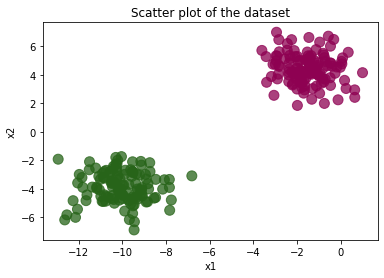

In [45]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

#Generate an artifical linearly-separable dataset with 2 features and 250 samples using make_blobs function from scikit-learn
N = 250
p = 2
X, y = datasets.make_blobs(
    n_samples=N, n_features=p, centers=2, cluster_std=1.05, random_state=1
)

plt.set_cmap('PiYG')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, alpha=0.75);
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter plot of the dataset");

<font face="XB Zar" size=4><div dir=rtl>
برای ساختن مدل، ابتدا مدل خود را بر روی داده‌های آموزش برازش می‌کنیم و سپس صحت پیشبینی آن را بر روی داده‌های تست بررسی میکنیم؛ در اینجا از 80% داده‌ها برای آموزش و از سایر 20% جهت تست‌کردن مدل استفاده شده است:
</div>

In [19]:
#Take 80% of data for training and the other 20% to test the accuracy of model
frac = 0.8
train_size = int(frac*N)
X_train = X[:train_size, :]
y_train = y[:train_size]

X_test = X[train_size:, :]
y_test = y[train_size:]

#Build the classifier
clf = maxMargin_classifier(learning_rate=1e-2, C=10, n_iters=1000)
#Fit the model on the train data
clf.fit(X_train, y_train)
#Predict the model on test data
y_pred_test = clf.predict(X_test)

#Find the accuracy of model on test set using the predicted labels with their true values
accuracy = np.sum(y_test==y_pred_test) / len(y_test)

print("Maximal Margin Classifier Accuracy:", accuracy*100, "%")

Maximal Margin Classifier Accuracy: 100.0 %


<font face="XB Zar" size=4><div dir=rtl>
در نهایت نیز می‌توانیم مرز بهینه را همراه با حاشیه بدست آمده ترسیم کنیم و نتایج خود را تایید نماییم: 
</div>

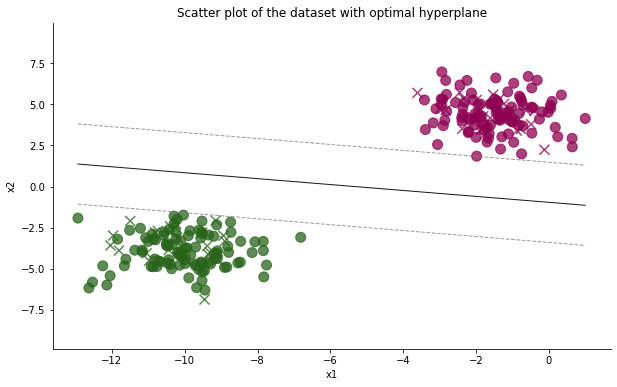

In [47]:
def get_hyperplane(x, w, b, offset):
    return (-w[0] * x - b + offset) / w[1]

fig, ax = plt.subplots(1, 1, figsize=(10,6))

plt.set_cmap('PiYG')
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, s=100, alpha=0.75)
plt.scatter(X_test[:, 0], X_test[:, 1], marker="x", c=y_test, s=100, alpha=0.75)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter plot of the dataset with optimal hyperplane");

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = get_hyperplane(x0_1, clf.w, clf.b, 0)
x1_2 = get_hyperplane(x0_2, clf.w, clf.b, 0)

x1_1_m = get_hyperplane(x0_1, clf.w, clf.b, -1)
x1_2_m = get_hyperplane(x0_2, clf.w, clf.b, -1)

x1_1_p = get_hyperplane(x0_1, clf.w, clf.b, 1)
x1_2_p = get_hyperplane(x0_2, clf.w, clf.b, 1)

ax.plot([x0_1, x0_2], [x1_1, x1_2], "-", c='k', lw=1, alpha=0.9)
ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "--", c='grey', lw=1, alpha=0.8)
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "--", c='grey', lw=1, alpha=0.8)

x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])

for spine in ['top','right']:
    ax.spines[spine].set_visible(False)

plt.show()

<font face="XB Zar" size=4><div dir=rtl>
<font color="red" size="6">طبقه‌بند بردار پشتیبان (Support Vector Classifier)</font> <br> <br>
    همانطور که می‌توانید حدس بزنید و در کلاس نیز اشاره شده است، طبقه‌بند بیشینه‌نمای حاشیه (Maximal Margin Classifier) فقط در شرایطی عملکرد صحیحی دارد که
    داده‌های دو کلاس به طور خطی تفکیک‌پذیر باشند. همچنین مرز این مدل توسط نمونه‌هایی مشخص می‌شود که بر روی حاشیه قرار میگیرند؛ در واقع در صورتی که فقط یکی از نمونه‌های آموزشی نزدیک به مرز مقداری تغییر اندازه داشته باشد، مرز تصمیم‌گیری به طور کامل تغییر میکند! 
    ذکر این نکته حائز اهمیت است که داده‌های ما در واقعیت در اکثر موارد مقداری Noise دارند و بنابراین مشکل بالا می‌تواند خیلی اثر نامطلوبی روی مرز تصمیم‌گیری ما داشته باشد. بنابراین این مدل به شدت قابلیت بیش‌برازش شدن (Overfitting) دارند.
    <br>در ادامه مدل <code> maxMargin_classifier </code> خود را برای این 2 حالت امتحان می‌کنیم:
</div>

<font face="XB Zar" size=4><div dir=rtl>
<font color="red" size="5">حالت اول: عدم تفکیک‌پذیری خطی داده‌ها</font> <br> 
    در ادامه بر روی دیتای نمودار زیر مدل خود را بررسی میکنیم؛ همانطور که از توزیع نمونه‌ها مشخص است، توسط یک مرز خطی تفکیک نمی‌شوند:
</div>

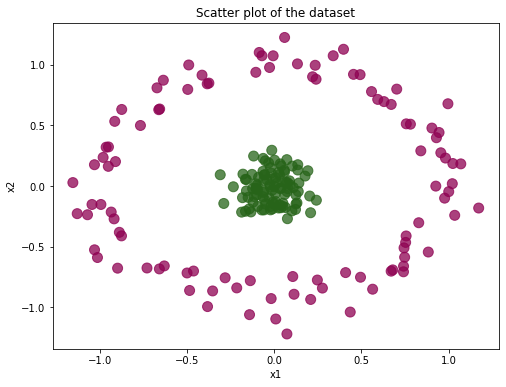

In [70]:
# create dataset
X, y = datasets.make_circles(200, factor=0.1, noise=0.1, random_state=3)

plt.figure(figsize=(8,6))
plt.set_cmap('PiYG')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, alpha=0.75);
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter plot of the dataset");

<font face="XB Zar" size=4><div dir=rtl>
می‌توانیم همانند بخش قبل مدل خود را بر داده‌های آموزش fit کرده و دقت آن را بر روی داده‌های تست بسنجیم:

In [76]:
frac = 0.8
train_size = int(frac*200)
X_train = X[:train_size, :]
y_train = y[:train_size]

X_test = X[train_size:, :]
y_test = y[train_size:]

#Build the classifier
clf = maxMargin_classifier(n_iters=1000)
#Fit the model on the train data
clf.fit(X_train, y_train)
#Predict the model on test data
y_pred_test = clf.predict(X_test)

#Find the accuracy of model on test set using the predicted labels with their true values
accuracy = np.sum(y_test==y_pred_test) / len(y_test)

print("Maximal Margin Classifier Accuracy:", accuracy*100, "%")

Maximal Margin Classifier Accuracy: 42.5 %


<font face="XB Zar" size=4><div dir=rtl>
همانطور که مشاهده میکنید، دقت مدل 42.5% می‌باشد که از مطلوب ما بسیار فاصله دارد؛ می‌توانیم مرزهای تصمیم‌گیری را نیز مانند بخش قبل ترسیم کنیم: 

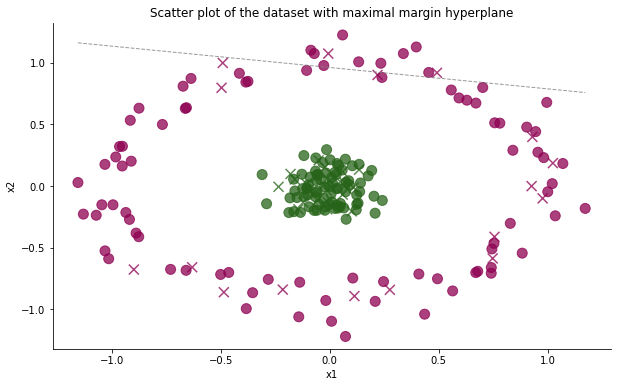

In [86]:
def get_hyperplane(x, w, b, offset):
    return (-w[0] * x - b + offset) / w[1]

fig, ax = plt.subplots(1, 1, figsize=(10,6))

plt.set_cmap('PiYG')
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, s=100, alpha=0.75)
plt.scatter(X_test[:, 0], X_test[:, 1], marker="x", c=y_test, s=100, alpha=0.75)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter plot of the dataset with maximal margin hyperplane");

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = get_hyperplane(x0_1, clf.w, clf.b, 0)
x1_2 = get_hyperplane(x0_2, clf.w, clf.b, 0)

x1_1_m = get_hyperplane(x0_1, clf.w, clf.b, -1)
x1_2_m = get_hyperplane(x0_2, clf.w, clf.b, -1)

x1_1_p = get_hyperplane(x0_1, clf.w, clf.b, 1)
x1_2_p = get_hyperplane(x0_2, clf.w, clf.b, 1)

ax.plot([x0_1, x0_2], [x1_1, x1_2], "-", c='k', lw=1, alpha=0.9)
ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "--", c='grey', lw=1, alpha=0.8)
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "--", c='grey', lw=1, alpha=0.8)

x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
ax.set_ylim([x1_min - 0.1, x1_max + 0.1])

for spine in ['top','right']:
    ax.spines[spine].set_visible(False)

plt.show()